In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.style.use("https://gist.githubusercontent.com/JonnyCBB/c464d302fefce4722fe6cf5f461114ea/raw/64a78942d3f7b4b5054902f2cee84213eaff872f/matplotlibrc")

In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
df = pd.read_csv("theta_k_lambda_table.csv")
df

,θ,k,λ
0,0.1,1,215.443469
1,0.1,5,12.115277
2,0.1,14,10.000000
3,0.1,2,316.227766
4,0.1,4,12.115277
...,...,...,...
445,0.9,10,56.234133
446,0.9,10,56.234133
447,0.9,13,46.415888
448,0.9,12,38.311868


/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 

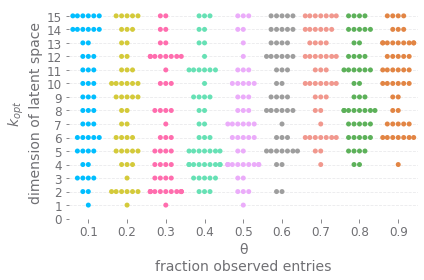

In [3]:
ax = sb.swarmplot(data=df, x="θ", y="k")
ax.set(yticks=[i for i in range(16)], xlabel="θ\nfraction observed entries", ylabel="$k_{opt}$\ndimension of latent space")
plt.tight_layout()
plt.savefig("beeswarm_k.pdf", format="pdf")

/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

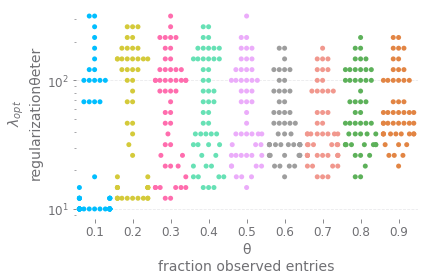

In [4]:
ax = sb.swarmplot(data=df, x="θ", y="λ")
ax.set(xlabel="θ\nfraction observed entries", ylabel="$\lambda_{opt}$\nregularizationθeter")
ax.set_yscale("log")
plt.tight_layout()
plt.savefig("beeswarm_lambda.pdf", format="pdf")

In [5]:
df[:]

,θ,k,λ
0,0.1,1,215.443469
1,0.1,5,12.115277
2,0.1,14,10.000000
3,0.1,2,316.227766
4,0.1,4,12.115277
...,...,...,...
445,0.9,10,56.234133
446,0.9,10,56.234133
447,0.9,13,46.415888
448,0.9,12,38.311868


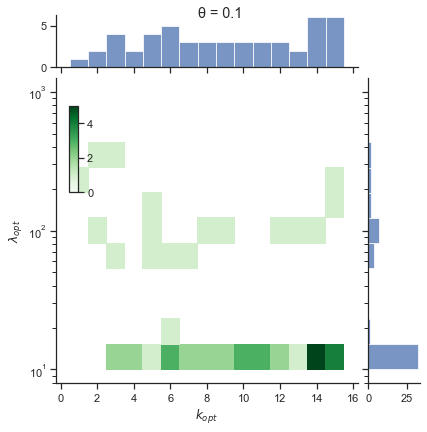

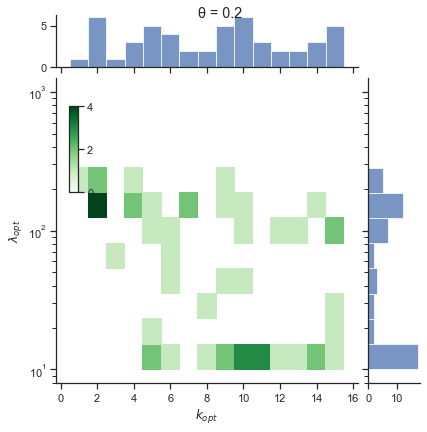

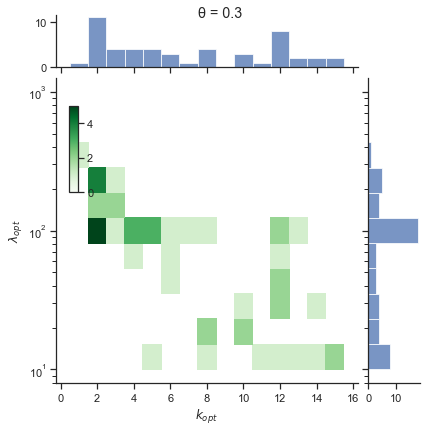

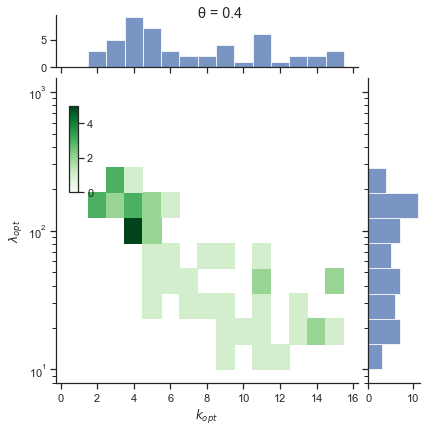

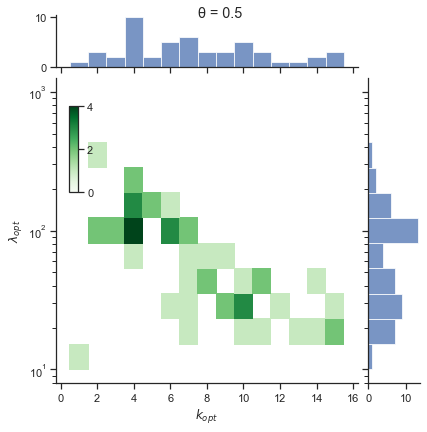

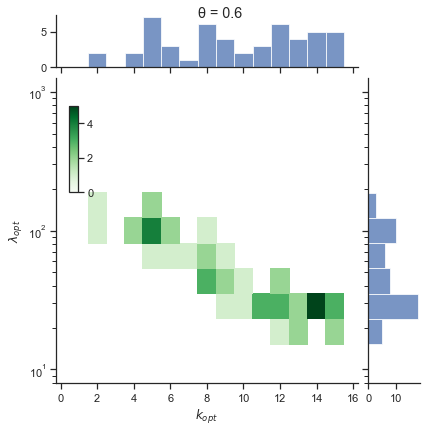

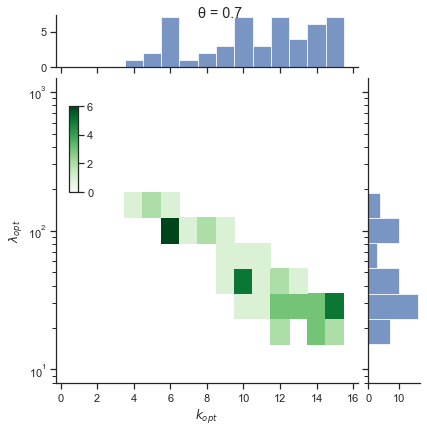

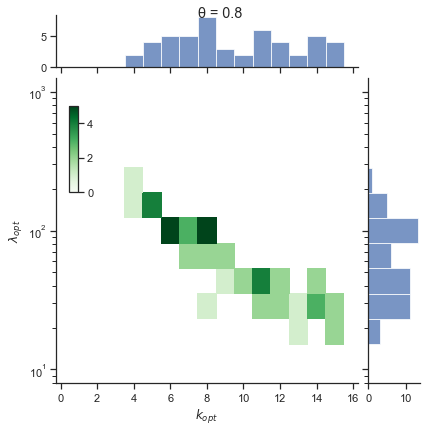

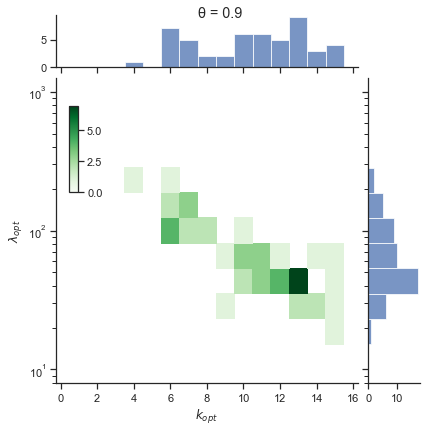

In [6]:
sb.set_theme(style="ticks")

k_bins = [i + 0.5 for i in range(16)]
lambda_bins = np.logspace(1.0, 3.0, 12)
# Load the planets dataset and initialize the figure
for θ, dfθ in df.groupby('θ'):
    g = sb.JointGrid(data=dfθ, x="k", y="λ", marginal_ticks=True)

    # Set a log scaling on the y axis
    g.ax_joint.set(yscale="log")

    # # Create an inset legend for the histogram colorbar
    cax = g.fig.add_axes([.15, .55, .02, .2])

    # # Add the joint and marginal histogram plots
    g.plot_joint(
        sb.histplot, discrete=(True, False),
        cmap="Greens",
        cbar_ax=cax,
        cbar=True,
        bins=(k_bins, np.linspace(1, 3, 12))
#         cmap="viridis", cbar=True, cbar_ax=cax
    )
    g.ax_joint.set(ylabel="$\lambda_{opt}$", xlabel="$k_{opt}$")
#     g.plot_marginals(sb.histplot, color="#03012d")
# #     g.ax_marg_x.set_xticklabels([])
    g.ax_marg_x.hist(dfθ['k'], bins=k_bins, color="C0", alpha=0.75)
    g.ax_marg_y.hist(dfθ['λ'], color="C0", alpha=0.75, orientation="horizontal", bins=lambda_bins)
#     g.ax_marg_x.set_xticks([])
#     g.ax_marg_y.set_yticks([])
#     g.plot_marginals(sb.histplot)
    g.fig.suptitle("θ = {}".format(θ))
    plt.savefig("hyper_params_theta" + "%d" % (θ*10) + ".pdf", format="pdf")

In [7]:
df_p = pd.read_csv("normalized_props.csv")
df_p.head()

,O$_2$\n298 K\n5 bar,O$_2$\n298 K\n140 bar,CO$_2$\n300 K\n0.001 bar,CO$_2$\n300 K\n30 bar,N$_2$\n300 K\n0.001 bar,N$_2$\n300 K\n30 bar,H$_2$\n77 K\n5 bar,H$_2$\n77 K\n100 bar,H$_2$\n298 K\n5 bar,H$_2$\n298 K\n100 bar,CH$_4$\n298 K\n65 bar,CH$_4$\n298 K\n5.8 bar,H$_2$O Henry\n300 K,H$_2$S Henry\n300 K,Xe Henry\n300 K,Kr Henry\n300 K
0,-0.342151,-0.135431,-0.124720,-0.342172,-0.379574,-0.394738,-0.244273,-0.110512,-0.152452,-0.136002,-0.111584,-0.390120,1.963224,0.231229,-0.027799,-0.211773
1,-0.102831,-0.323461,-0.133792,-0.097363,0.343906,-0.060972,-0.341531,-0.244440,-0.271515,-0.268550,-0.353780,0.115161,-0.748286,0.427059,0.651624,0.481147
2,0.074856,0.517283,-0.267333,0.083429,-0.089346,0.193428,0.464673,0.499920,0.494551,0.488914,0.553994,-0.108647,-0.692857,-0.654785,-0.544820,-0.367312
3,1.386308,-1.283309,1.075652,-1.540245,2.685528,-0.912070,-1.410429,-1.141637,-0.836398,-0.989557,-1.478426,0.109319,-0.655496,3.641330,4.583142,4.299472
4,-0.038111,-0.191210,-0.173071,0.158236,0.318506,0.091541,-0.223760,-0.246541,-0.257327,-0.236470,-0.088501,0.328974,-0.005951,0.634924,0.473954,0.428432


In [8]:
df_p[df_p.columns[1:3]][1:100]

,O$_2$\n298 K\n140 bar,CO$_2$\n300 K\n0.001 bar
1,-0.323461,-0.133792
2,0.517283,-0.267333
3,-1.283309,1.075652
4,-0.191210,-0.173071
5,-0.444484,-0.270977
...,...,...
95,-0.797744,0.157433
96,0.079688,-0.303389
97,-0.162989,0.027249
98,1.202682,-0.131650


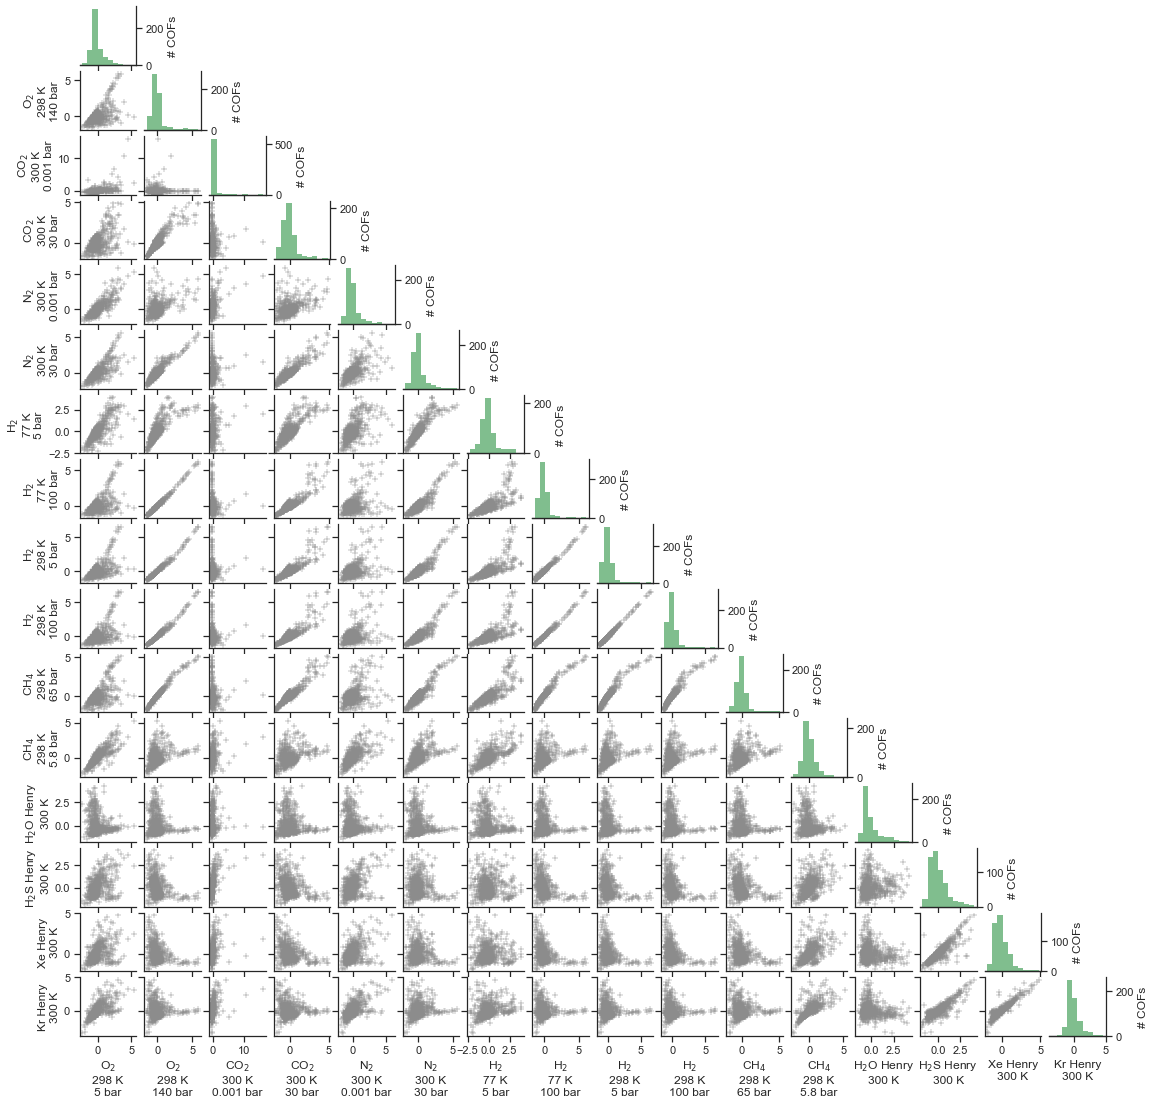

In [16]:
# see here: https://stackoverflow.com/questions/65345377/proper-diagonal-y-axes-for-seaborn-pairplot
def my_hist(x, label, color):
    ax0 = plt.gca()
    ax = ax0.twinx()
    
    sb.despine(ax=ax, left=True, top=True, right=False)
    ax.yaxis.tick_right()
#     ax.set_ylim([0, 600])
    ax.set_ylabel('# COFs')
    
    ax.hist(x, label=label, color="C2", ec="None", alpha=0.75)

g = sb.PairGrid(df_p, corner=True)
g.fig.set_size_inches(15., 15.)
g.map_diag(my_hist)
g.map_lower(sb.scatterplot, marker="+", color="C7")
plt.savefig("scatterplot_matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()

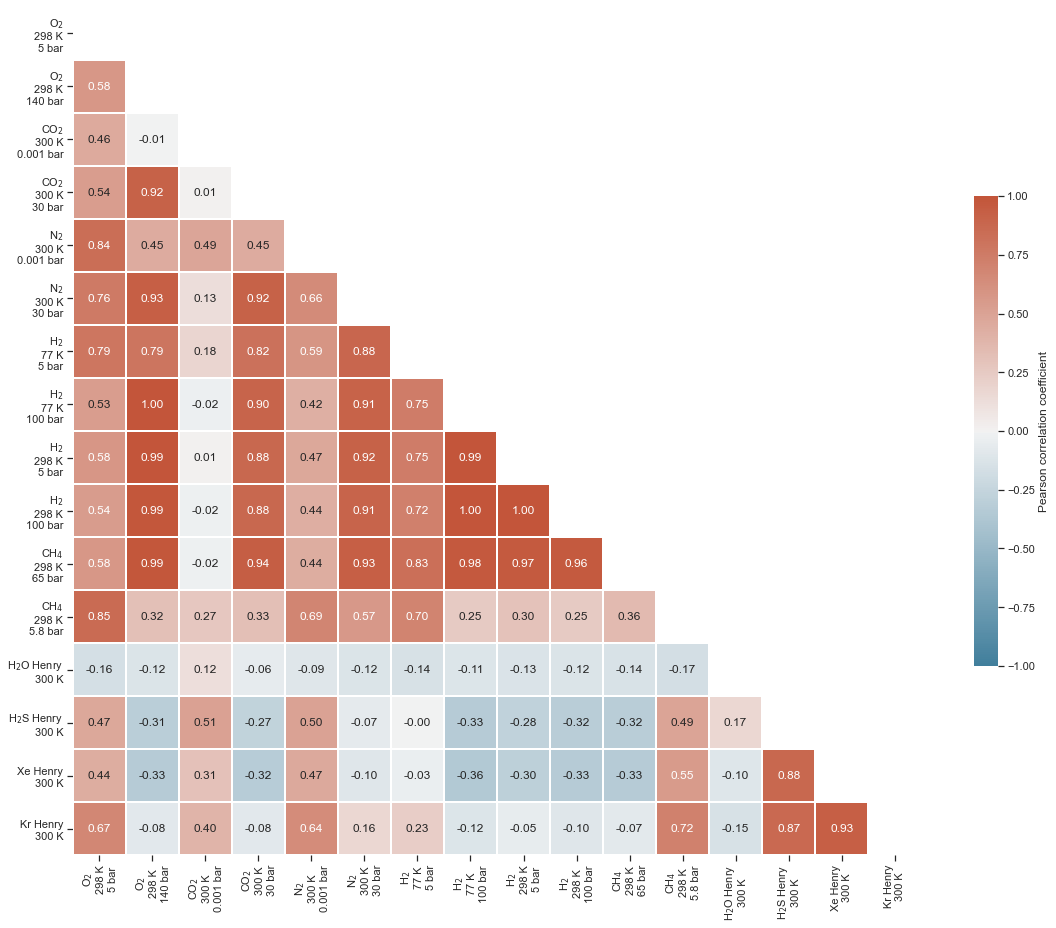

In [10]:
# Compute the correlation matrix
corr = df_p.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1.0, vmin=-1.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, 'label':'Pearson correlation coefficient'}, annot=True, fmt=".2f")

plt.tight_layout()
plt.savefig('corr_matrix.pdf', format='pdf')

# check Cory's code in the Pluto notebook with uncertainty toolbox

In [11]:
# import uncertainty_toolbox as uct
# import numpy as np
# import uncertainty_toolbox.viz as uviz

# # load in Pluto notebook
# predictions     = np.load("for_uncertainty_metrics.npz")["predictions"]
# predictions_std = np.load("for_uncertainty_metrics.npz")["predictions_std"]
# y               = np.load("for_uncertainty_metrics.npz")["y"]

In [12]:
# uviz.plot_calibration(predictions, predictions_std, y)

In [13]:
# uviz.plot_intervals_ordered(predictions, predictions_std, y)

In [14]:
# uviz.plot_intervals(predictions, predictions_std, y)